Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


importing dataset

In [ ]:
import os
print(os.listdir('/content'))


['.config', 'drive', 'sample_data']


In [ ]:
from zipfile import ZipFile

data_path = "/content/drive/MyDrive/project/Lung Cancer Prediction using CNN.zip"

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')






The data set has been extracted.


Data Visualization

In [ ]:
path = 'lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
classes


['lung_scc', 'lung_n', 'lung_aca']

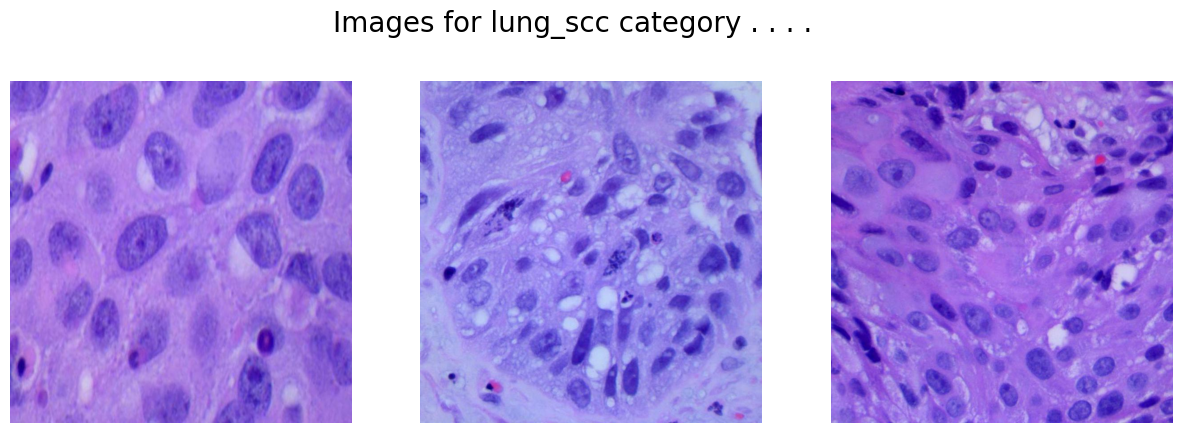

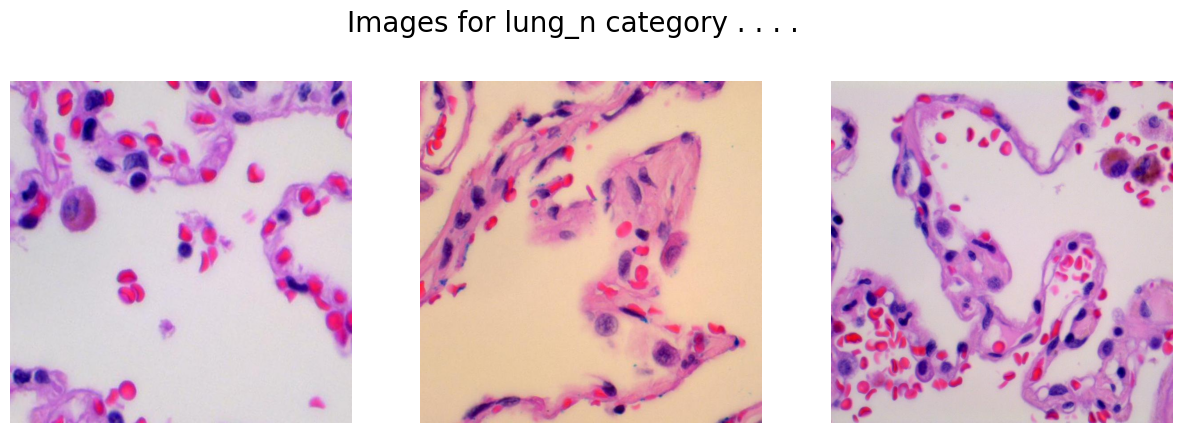

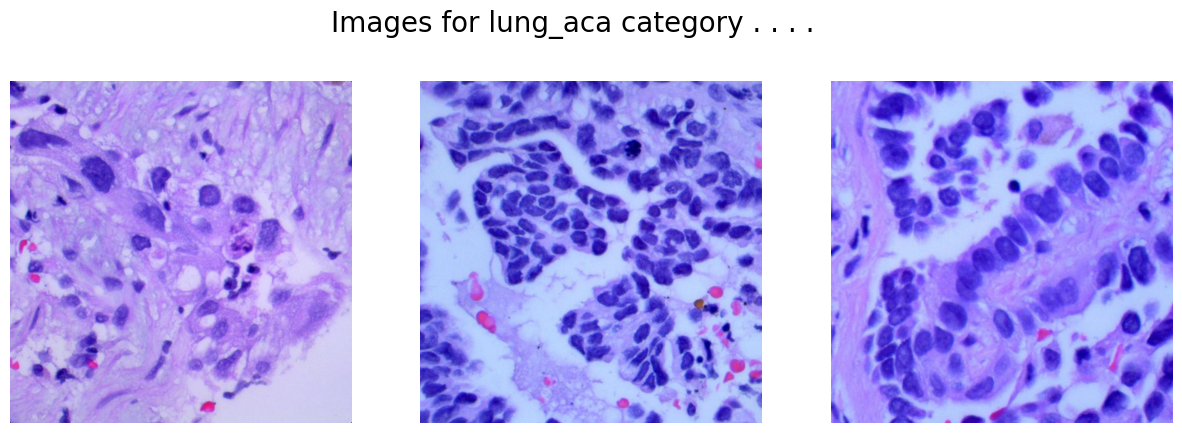

In [ ]:
path = '/content/lung_colon_image_set/lung_image_sets'

for cat in classes:
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()


Data preparation for training

In [ ]:
IMG_SIZE = 128
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 16


In [ ]:
X = []
Y = []

for i, cat in enumerate(classes):
    images = glob(f'/content/lung_colon_image_set/lung_image_sets/{cat}/*.jpeg')  # Fixed formatting

    for image in images:
        img = cv2.imread(image)
        X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
        Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y,
												test_size = SPLIT,
												random_state = 2022)
print(X_train.shape, X_val.shape)


(12000, 128, 128, 3) (3000, 128, 128, 3)


Model Development

In [ ]:
model = keras.models.Sequential([
	layers.Conv2D(filters=32,
				kernel_size=(5, 5),
				activation='relu',
				input_shape=(IMG_SIZE,
							IMG_SIZE,
							3),
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=64,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=128,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(256, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(3, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,518,467 (32.50 MB)

 Trainable params: 8,517,699 (32.49 MB)

 Non-trainable params: 768 (3.00 KB)

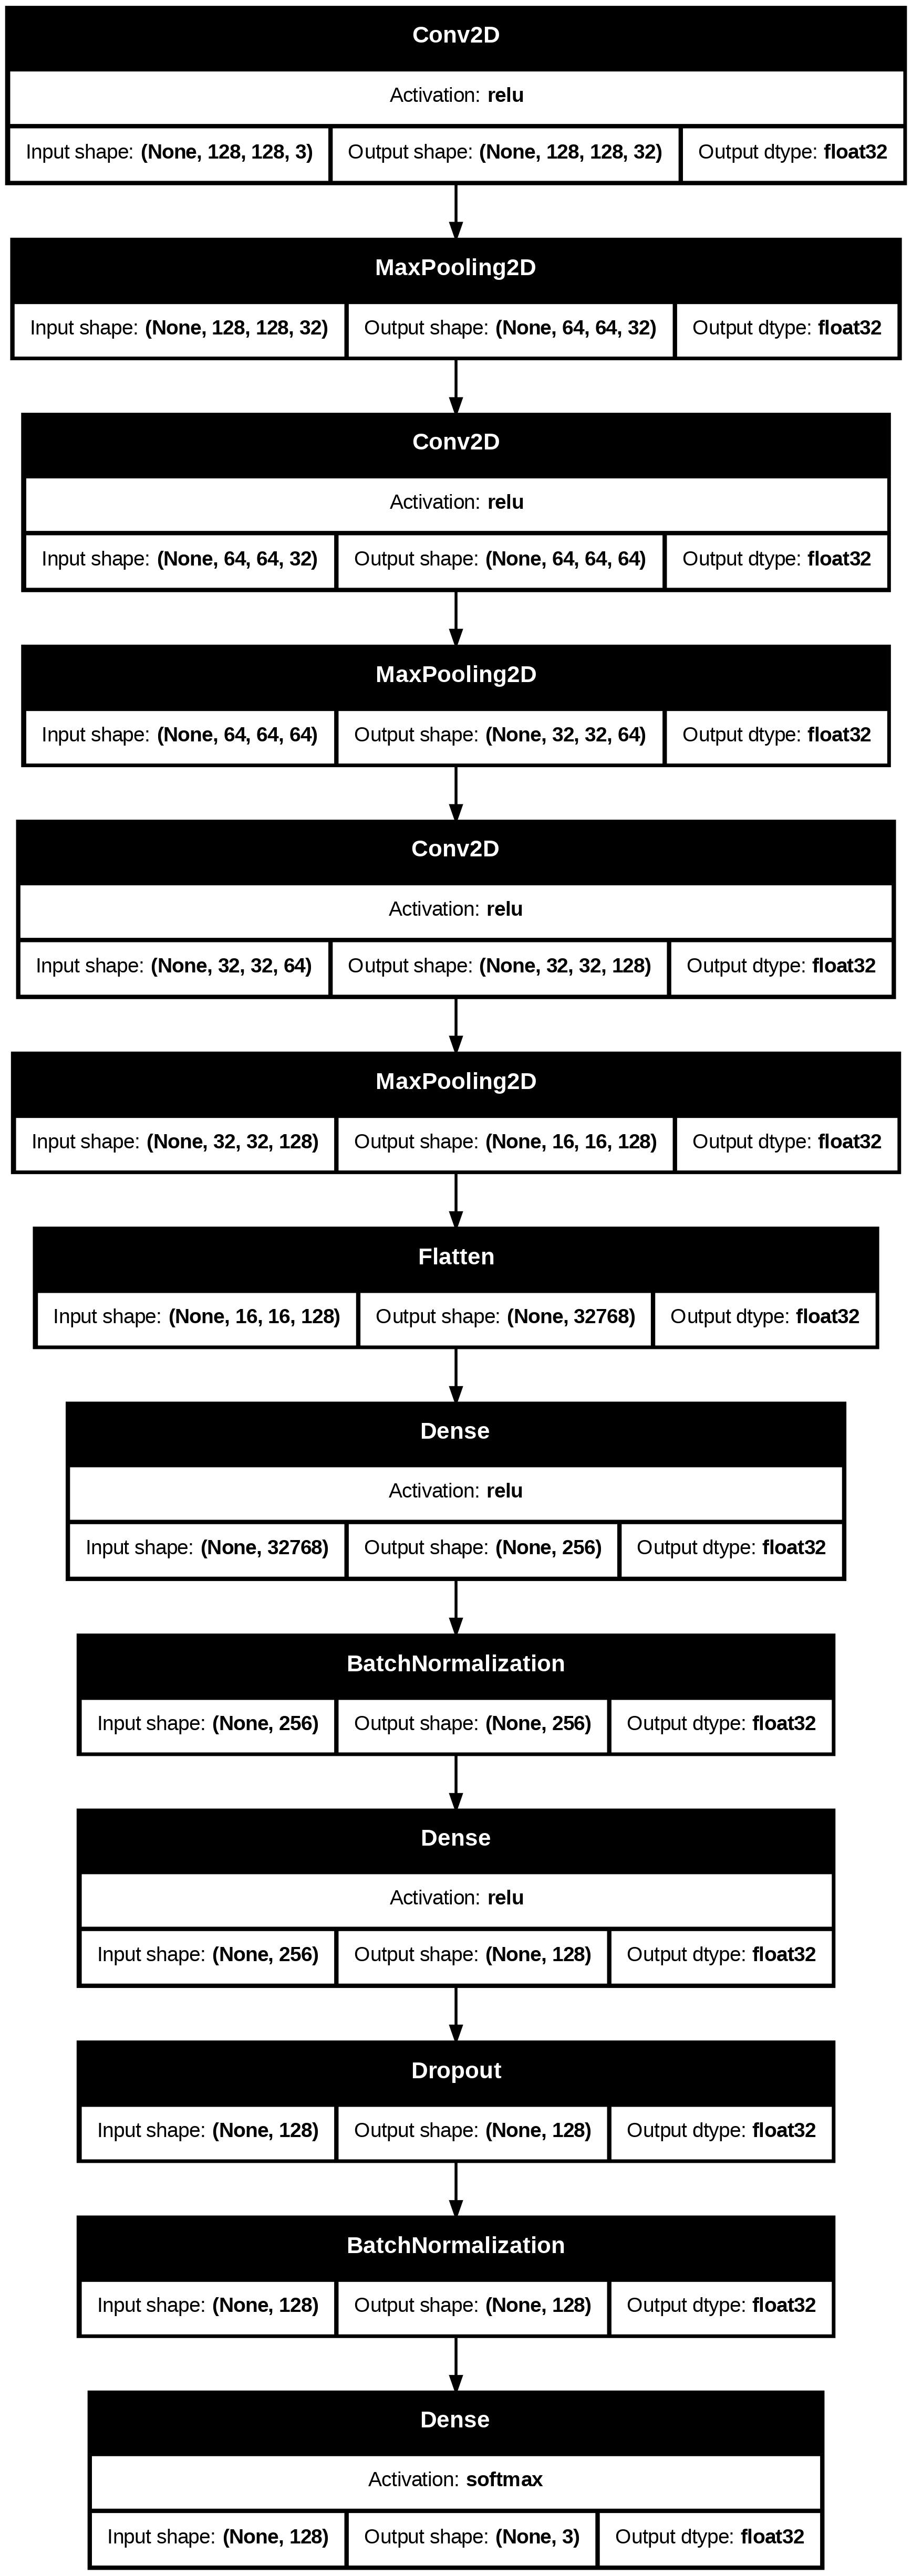

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

optimizer – This is the method that helps to optimize the cost function by using gradient descent.

loss – The loss function by which we monitor whether the model is improving with training or not.

metrics – This helps to evaluate the model by predicting the training and the validation data.

In [ ]:
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)

Callback

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if logs.get('val_accuracy') > 0.90:
			print('\n Validation accuracy has reached upto \
					90% so, stopping further training.')
			self.model.stop_training = True


es = EarlyStopping(patience=3,
				monitor='val_accuracy',
				restore_best_weights=True)

lr = ReduceLROnPlateau(monitor='val_loss',
					patience=2,
					factor=0.5,
					verbose=1)


Now we will train our model

In [ ]:
history = model.fit(X_train, Y_train,
					validation_data = (X_val, Y_val),
					batch_size = BATCH_SIZE,
					epochs = EPOCHS,
					verbose = 1,
					callbacks = [es, lr, myCallback()])


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 622s 825ms/step - accuracy: 0.8099 - loss: 0.4936 - val_accuracy: 0.6643 - val_loss: 0.8163 - learning_rate: 0.0010
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 625s 834ms/step - accuracy: 0.8908 - loss: 0.2797 - val_accuracy: 0.3680 - val_loss: 4.3357 - learning_rate: 0.0010
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.9065 - loss: 0.2369
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
750/750 ━━━━━━━━━━━━━━━━━━━━ 620s 827ms/step - accuracy: 0.9065 - loss: 0.2369 - val_accuracy: 0.5193 - val_loss: 2.9784 - learning_rate: 0.0010
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 622s 827ms/step - accuracy: 0.9217 - loss: 0.2060 - val_accuracy: 0.6700 - val_loss: 1.7530 - learning_rate: 5.0000e-04
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9313 - loss: 0.1759
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
750/750 ━━━━━━━━━━━━━━━━━━━━ 629s 839ms/step - accuracy

Let’s visualize the training and validation accuracy with each epoch.

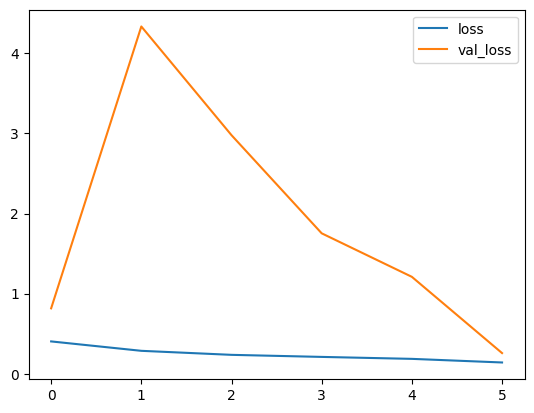

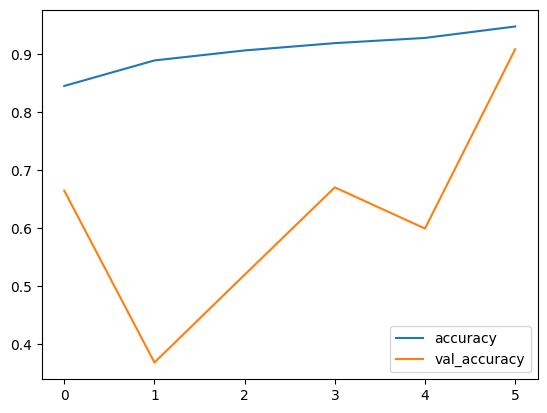

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

Model Evaluation

In [ ]:
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 464ms/step


In [ ]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[918,   6,  63],
       [  0, 977,   0],
       [ 99, 107, 830]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred,
									target_names=classes))

              precision    recall  f1-score   support

    lung_scc       0.90      0.93      0.92       987
      lung_n       0.90      1.00      0.95       977
    lung_aca       0.93      0.80      0.86      1036

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

